# Online Portfolio Selection: Benchmarks

In this notebook, we will walk through the benchmarks strategies implemented in mlfinlab's online portfolio selection module.

In particular, we will take a look at
1. Buy and Hold
2. Best Stock
3. Constant Rebalanced Portfolio
4. Best Constant Rebalanced Portfolio

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlfinlab.online_portfolio_selection import *

## Import Data

We will use the ETF data included in the mlfinlab library for analysis. This includes 23 ETF's with closing prices from 2008 to 2016

In [5]:
stock_prices = pd.read_csv('../tests/test_data/stock_prices.csv', parse_dates=True, index_col='Date')
stock_prices = stock_prices.dropna(axis=1)

In [6]:
stock_prices.head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,49.273335,35.389999,106.639999,52.919998,78.220001,87.629997,37.939999,47.759998,41.299999,79.500000,...,42.090000,51.173328,55.983330,74.529999,67.309998,144.929993,94.379997,77.360001,101.400002,130.630005
2008-01-03,49.716667,35.290001,107.000000,53.119999,78.349998,87.809998,37.919998,48.060001,42.049999,80.440002,...,42.029999,51.293331,55.599998,74.800003,67.500000,144.860001,94.250000,77.459999,101.519997,130.740005
2008-01-04,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000,...,42.349998,49.849998,54.536671,72.980003,65.769997,141.309998,94.269997,77.550003,101.650002,128.169998
2008-01-07,48.576668,34.630001,106.949997,51.439999,76.650002,88.199997,37.259998,47.060001,40.220001,77.199997,...,43.230000,50.416672,56.116669,72.949997,65.650002,141.190002,94.680000,77.570000,101.720001,128.059998
2008-01-08,48.200001,34.389999,107.029999,51.320000,76.220001,88.389999,36.970001,46.400002,39.599998,75.849998,...,43.240002,49.566669,55.326672,72.400002,65.360001,138.910004,94.570000,77.650002,101.739998,125.849998


## Benchmarks

These are benchmarks that should be a guidance for other portfolio selection strategies. Typically, these are implemented in hindsight, so future data is incorporated within the selection of our portfolio. We do not have access to future data from the current time, so strategies here should be taken with a grain of salt.

## 1. Buy and Hold

Buy and Hold is a strategy where an investor invests in an initial portfolio and never rebalances it. The portfolio weights, however, change as time pass because of the underlying assets change in prices.

Returns for Buy and Hold can be calculated by multiplying the initial weight and the cumulative product of relative returns.

$S_n(BAH(b_1)) = b_1 \cdot \left(\overset{n}{\underset{t=1}{\bigodot}} x_t\right)$

Buy and Hold strategy can be called using BAH()

In [7]:
bah = BAH()
bah.allocate(stock_prices)

Because, we didn't specificy a weight when we allocated to the strategy, initial weights are uniformly distributed across all the ETF's for time 0

In [8]:
bah.all_weights.head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-03,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-04,0.043781,0.043268,0.043537,0.043554,0.043462,0.043479,0.043367,0.043663,0.044178,0.043903,...,0.043328,0.043492,0.043093,0.043547,0.043513,0.043369,0.043331,0.043446,0.043442,0.043427
2008-01-07,0.043220,0.043175,0.044298,0.043193,0.043230,0.044368,0.043055,0.043384,0.043605,0.043050,...,0.044434,0.043019,0.043020,0.043243,0.043151,0.043058,0.044110,0.044270,0.044270,0.043330
2008-01-08,0.043437,0.043114,0.044188,0.042828,0.043176,0.044347,0.043271,0.043415,0.042908,0.042786,...,0.045254,0.043409,0.044165,0.043126,0.042974,0.042923,0.044200,0.044180,0.044199,0.043194


The weights change over time becase the price increase and decrease depending on the ETF prices.

In [9]:
bah.all_weights.tail()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-27,0.029938,0.029988,0.049053,0.038726,0.030994,0.057853,0.026079,0.027566,0.050344,0.037951,...,0.054111,0.033364,0.026220,0.026964,0.036475,0.063358,0.064999,0.048883,0.047168,0.060049
2016-06-28,0.029835,0.029540,0.049666,0.038889,0.030689,0.058910,0.025715,0.026721,0.049112,0.037086,...,0.055299,0.032979,0.026381,0.026511,0.036470,0.062817,0.067257,0.049597,0.047586,0.059777
2016-06-29,0.030271,0.029711,0.049119,0.038906,0.031040,0.058051,0.026115,0.027466,0.048818,0.037569,...,0.054705,0.033338,0.026627,0.026986,0.036686,0.063028,0.066426,0.048940,0.046945,0.059817
2016-06-30,0.030720,0.029810,0.048588,0.039013,0.031286,0.057224,0.026305,0.027893,0.049138,0.037890,...,0.054294,0.033510,0.026832,0.027253,0.036800,0.063446,0.065243,0.048423,0.046487,0.060166
2016-07-01,0.030727,0.029944,0.048208,0.038302,0.031445,0.056796,0.026561,0.028361,0.049441,0.037823,...,0.054931,0.033754,0.026934,0.027586,0.036483,0.063689,0.064849,0.048017,0.046102,0.060380


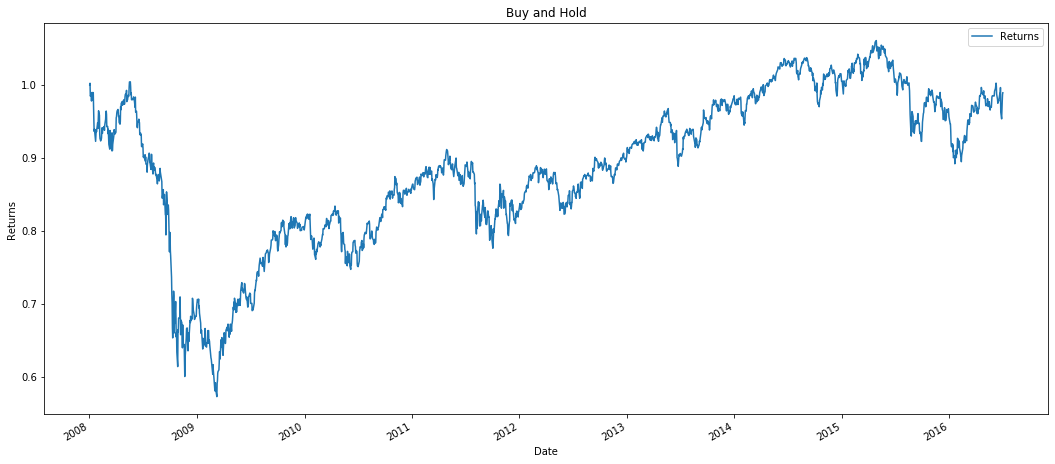

In [10]:
bah.portfolio_return.plot(title='Buy and Hold', figsize=(18,8)).set_ylabel('Returns');

With the crash in 2009, Buy and Hold strategies have returned almost the same returns from the initial allocation. Considering inflation, Buy and Hold has been a disappointing strategy for these sets of assets.

## 2. Best Stock

Best Stock strategy chooses the best performing asset in hindsight. The best performing asset is determined with an argmax equation stated below. The algorithm searches for the stock that increases the most in price for the given time period.

$b_0 = \underset{b \in \Delta_m}{\arg\max} \: b \cdot \left(\overset{n}{\underset{t=1}{\bigodot}}  x_t \right)$

Once the initial portfolio has been determined, the final weights can be represented as buying and holding the initial weight:

$S_n(BEST) = \underset{b \in \Delta_m}{\max} b \cdot \left(\overset{n}{\underset{t=1}{\bigodot}}  x_t \right) = S_n(BAH(b_0))$

Best Stock can be called using BESTSTOCK().

In [14]:
best_stock = BESTSTOCK()
best_stock.allocate(stock_prices)

If we examine all of the weights assigned to best_stock, we can notice that all the weights are set to 0 except for TLT. For the given period and price data, TLT was the best performing asset, so the portfolio strategy chooses to allocate all of its on weight on TLT.

In [15]:
best_stock.all_weights

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2008-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2008-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2008-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2008-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


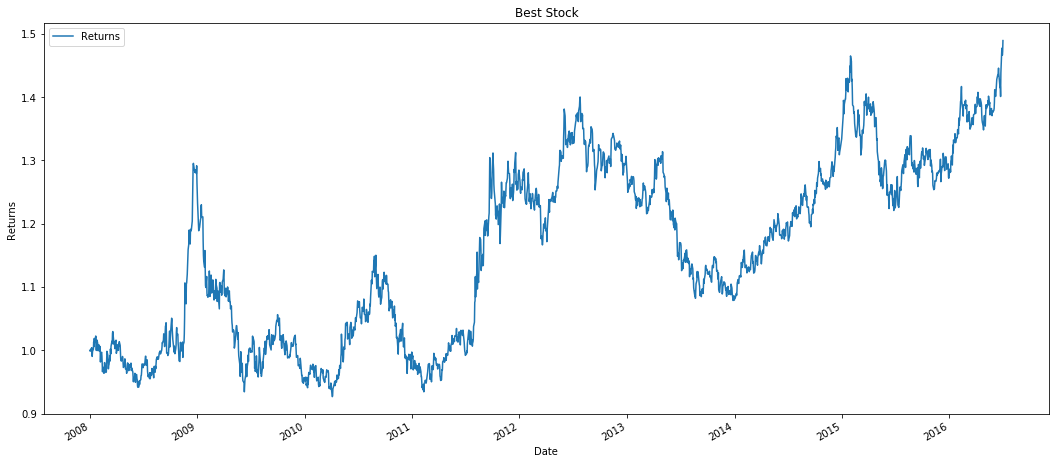

In [16]:
best_stock.portfolio_return.plot(title='Best Stock', figsize=(18,8)).set_ylabel('Returns');

As seen with the above graph, we are directly tracking TLT, the best performing stock. The same exact graph can be replicated by buying only TLT from the beginning using the Buy and Hold strategy since we are not rebalancing the portfolio.

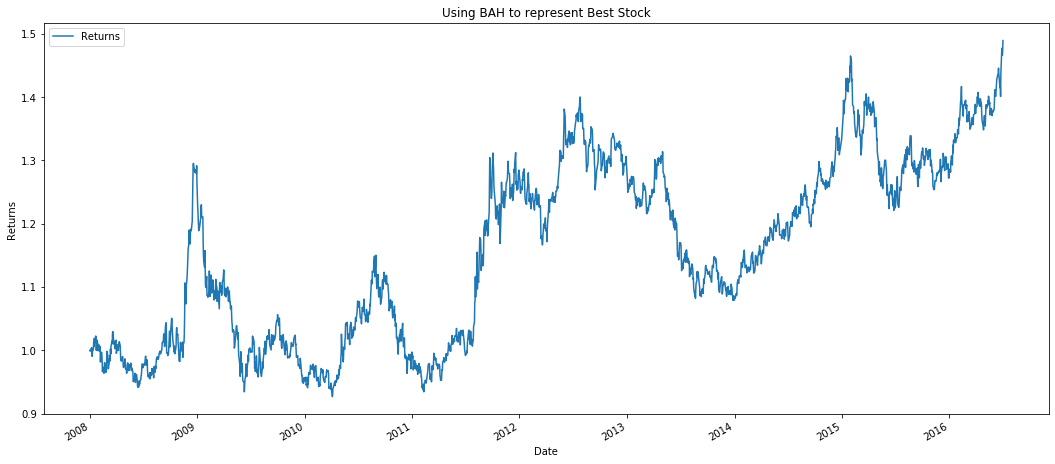

In [17]:
bah_best_stock = BAH()
buy_TLT = np.array(best_stock.all_weights.iloc[0])
bah_best_stock.allocate(stock_prices, weights=buy_TLT)
bah_best_stock.portfolio_return.plot(title='Using BAH to represent Best Stock', figsize=(18,8)).set_ylabel('Returns');

## 3. Constant Rebalanced Portfolio

Constant Rebalanced Portfolio rebalances to a certain portfolio weight for every time period. This particular weight can be set by the user, and if there are no inputs, it will automatically allocate equal weights to all assets. The total returns for a CRP can be calculated by taking cumulative product of the weight and relative returns matrix.

$S_n(CRP(b)) = \overset{n}{\underset{t=1}{\prod}} \:  b^{\top}x_t$

Constant Rebalanced Portfolio can be called with CRP(), and the weights can be initiated with CRP(weights=weights). If no weights are specified, it will initialize to uniform weights across all time.

In [18]:
crp = CRP()
crp.allocate(stock_prices)
crp.all_weights

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-03,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-04,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-07,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2008-01-08,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2016-06-28,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
2016-06-29,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478


The weights stay constant over the given time period.

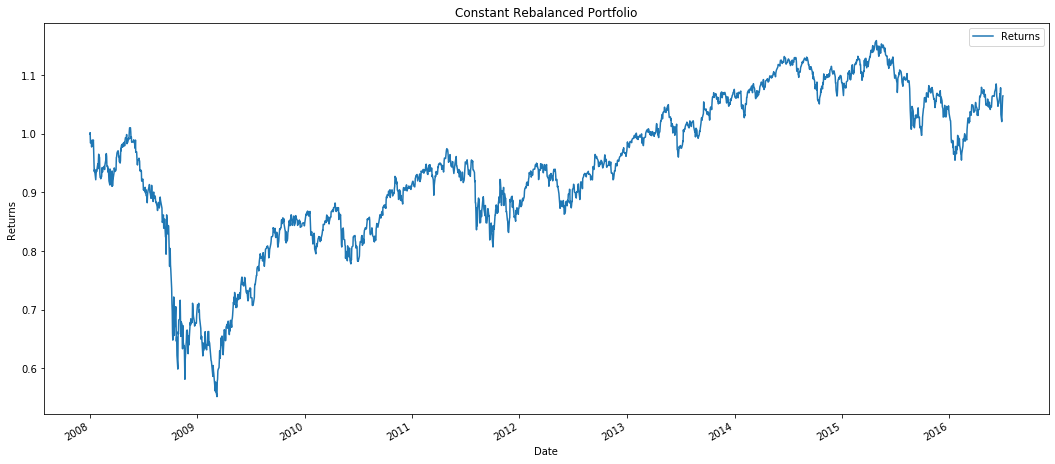

In [19]:
crp.portfolio_return.plot(title='Constant Rebalanced Portfolio', figsize=(18,8)).set_ylabel('Returns');

In a way, CRP performs a passive mean reversion. For the prices that decrease, the following period's weight should decrease. However by allocating weight to even out and return to the predetermined number, the portfolio consistently shifts weights from increasing assets to decreasing assets. However, the returns portrayed with CRP is disappointing as well. The change from 1.0 to 1.1 over 8 years is not an optimal portfolio.

## 4. Best Constant Rebalanced Portfolio

Best Constant Rebalanced Portfolio is a strategy that is implemented in hindsight, which is similar to Best Stock. It uses the same weight for all time periods. However, it determines those weights by having the complete market sequence of the past. The objective function for BCRP looks to maximize portfolio returns with the equation below.

$b^{\bf{\star}} = \underset{b^n \in \Delta_m}{\arg\max} \: S_n(CRP(b)) = \underset{b \in \Delta_m}{\arg\max} \overset{n}{\underset{t=1}{\prod}} \:  b^{\top}x_t$

Once the optimal weight has been determined, the final returns can be calculated by using the CRP returns equation.

$S_n(BCRP) = \underset{b \in \Delta_m}{\max} \: S_n(CRP(b)) = S_n(CRP(b^{\bf \star}))$

Best Constant Rebalanced Portfolio strategy can be called with BCRP().

In [20]:
bcrp = BCRP()
bcrp.allocate(stock_prices)
print(bcrp.all_weights.iloc[0])
bcrp.all_weights.iloc[[0,-1]]

EEM    0.000000
EWG    0.000000
TIP    0.000000
EWJ    0.000000
EFA    0.000000
IEF    0.000000
EWQ    0.000000
EWU    0.000000
XLB    0.000000
XLE    0.000000
XLF    0.000000
LQD    0.000000
XLK    0.625272
XLU    0.000000
EPP    0.000000
FXI    0.000000
VGK    0.000000
VPL    0.000000
SPY    0.000000
TLT    0.374728
BND    0.000000
CSJ    0.000000
DIA    0.000000
Name: 2008-01-02 00:00:00, dtype: float64


,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.374728,0.0,0.0,0.0
2016-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.374728,0.0,0.0,0.0


As seen from above, the weights are the same from the beginning of the time period to the end. BCRP returns weights of 0.374728 to TLT, which was the best performing stock, and 0.625272 to XLK.

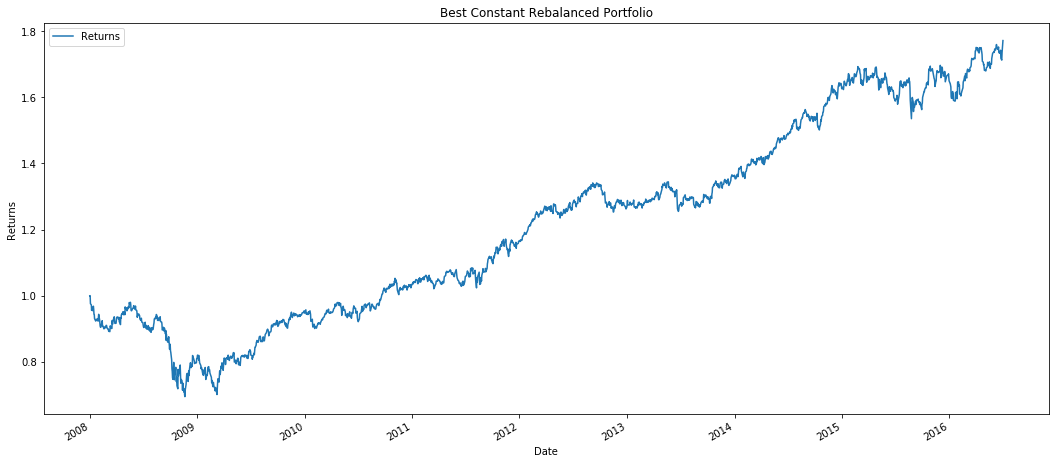

In [22]:
bcrp.portfolio_return.plot(title='Best Constant Rebalanced Portfolio', figsize=(18,8)).set_ylabel('Returns');

BCRP achieves much higher returns than any other portfolios that we have seen so far. However, this is due to the fact that we had the data to the complete market sequence. This is impossible to implement in the real market, but it is a good strategy to keep in hand as we implement other strategies. For other portfolios and the given dataset, we should look to perform better than the 1.8 given with BCRP strategy